In [76]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/home/ubuntu/Desktop/Extended/mechanical_analysis.csv')

# Explore the first few rows and get basic info
print(data.head())
print(data.info())


   instance  number  sup  cpm    mis  misr dir   omega  class  comb. class  \
0         1       0    3    0  120.0  21.0  ao  1000.0      1          7.0   
1         1       1    3    0   55.0   7.5  aa  1000.0      1          7.0   
2         1       2    3    0   26.0   1.4  vo  1000.0      1          7.0   
3         1       3    3    0   11.0   0.8  va  1000.0      1          7.0   
4         1       4    2    0    7.0   5.5  ao  1000.0      1          7.0   

   other class  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9254 entries, 0 to 9253
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   instance     9254 non-null   int64  
 1   number       9254 non-null   int64  
 2   sup          9254 non-null   int64  
 3   cpm          9254 non-null   int64  
 4   mis          9254 non-null   float64
 5   misr         9254 non-n

In [77]:
print(data.columns)

Index(['instance', 'number', 'sup', 'cpm', 'mis', 'misr', 'dir', 'omega',
       'class', 'comb. class', 'other class'],
      dtype='object')


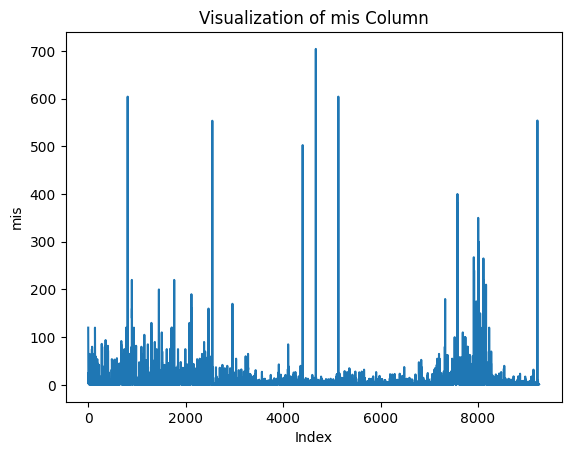

In [78]:
import matplotlib.pyplot as plt

# Plot the 'mis' column
plt.plot(data['mis'])
plt.title('Visualization of mis Column')
plt.xlabel('Index')
plt.ylabel('mis')
plt.show()

Outliers (Z-score method): [   0   76   80  139  140  278  342  357  403  675  679  680  742  776
  777  810  892  896  897  898  938  939  983 1092 1152 1224 1297 1298
 1299 1367 1404 1450 1451 1509 1510 1612 1686 1710 1711 1720 1765 1843
 1993 2078 2079 2117 2118 2123 2378 2465 2469 2473 2477 2478 2547 2955
 2959 2960 2964 2965 2968 4103 4401 4671 5133 7318 7324 7325 7520 7530
 7571 7572 7573 7577 7579 7581 7582 7585 7687 7711 7732 7740 7786 7790
 7913 7919 7963 7969 8003 8011 8043 8053 8083 8110 8111 8116 8117 8163
 8164 8228 9218]


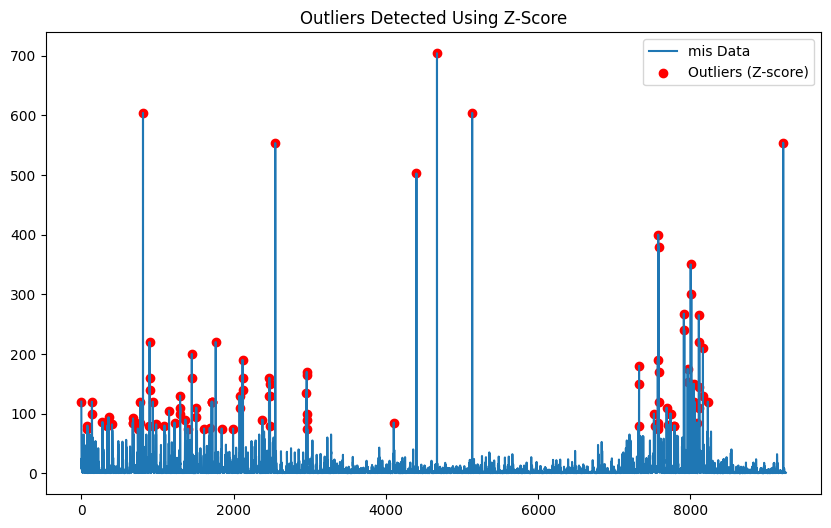

Outliers (IQR method): 0       120.0
1        55.0
2        26.0
5        25.0
6        13.0
        ...  
9137     32.0
9138     26.5
9147     17.0
9148     14.0
9218    554.0
Name: mis, Length: 1000, dtype: float64


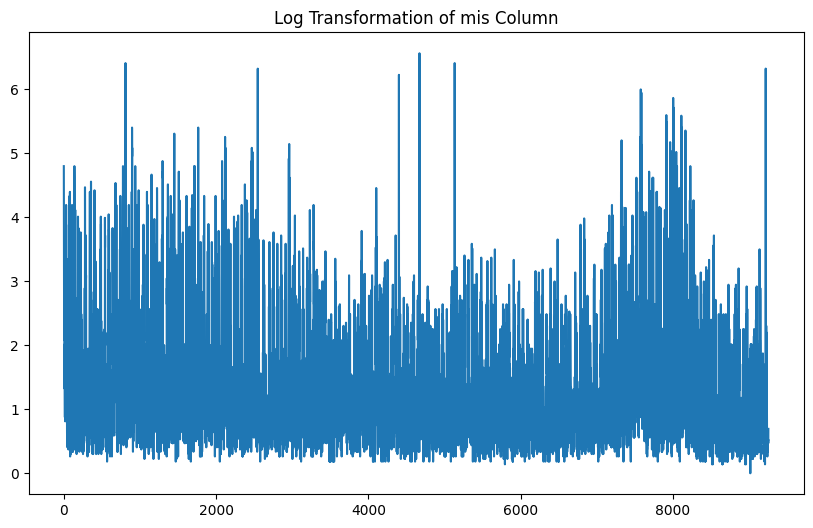

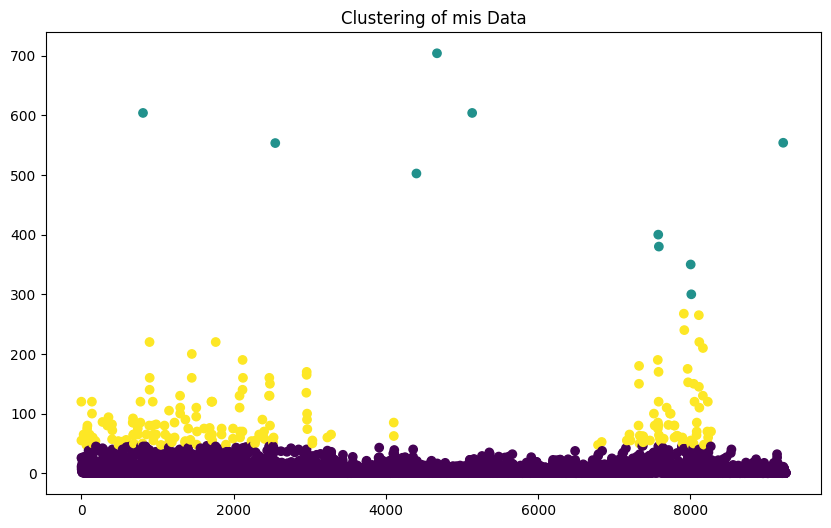

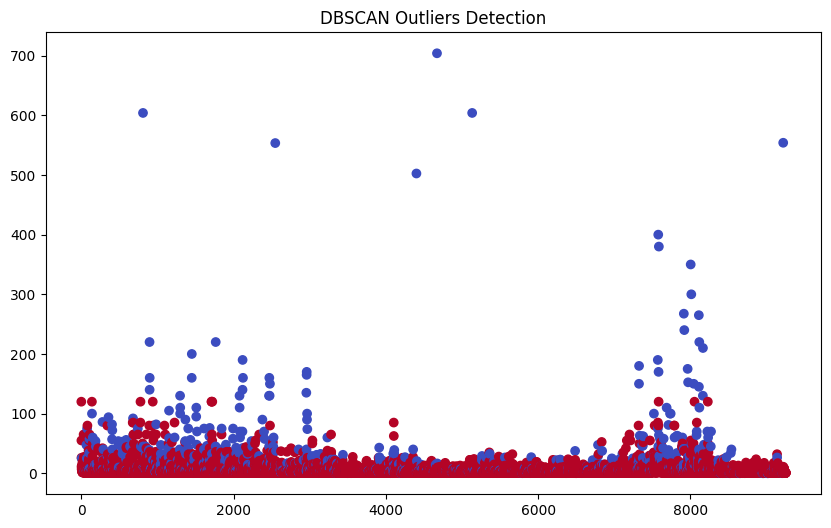

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.neighbors import LocalOutlierFactor

# Load your data
data = pd.read_csv('/home/ubuntu/Desktop/Extended/mechanical_analysis.csv')

# Checking the 'mis' column
mis_data = data['mis']

# 1. Outlier Detection with Z-Score
from scipy.stats import zscore
z_scores = zscore(mis_data)
outliers_zscore = np.where(np.abs(z_scores) > 3)[0]  # Points with Z-score > 3 are considered outliers
print(f"Outliers (Z-score method): {outliers_zscore}")

# Plot the data with outliers marked
plt.figure(figsize=(10, 6))
plt.plot(mis_data, label='mis Data')
plt.scatter(outliers_zscore, mis_data[outliers_zscore], color='red', label='Outliers (Z-score)')
plt.title("Outliers Detected Using Z-Score")
plt.legend()
plt.show()

# 2. Outlier Detection using IQR (Interquartile Range)
Q1 = mis_data.quantile(0.25)
Q3 = mis_data.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_iqr = mis_data[(mis_data < lower_bound) | (mis_data > upper_bound)]
print(f"Outliers (IQR method): {outliers_iqr}")

# 3. Log Transformation to reduce skewness
mis_data_log = np.log1p(mis_data)  # log(1 + x) to avoid log(0)
plt.figure(figsize=(10, 6))
plt.plot(mis_data_log)
plt.title("Log Transformation of mis Column")
plt.show()

# 4. Clustering with K-Means to detect similar patterns
# Reshape the data for clustering
mis_data_reshaped = mis_data.values.reshape(-1, 1)
scaler = StandardScaler()
mis_data_scaled = scaler.fit_transform(mis_data_reshaped)

kmeans = KMeans(n_clusters=3, random_state=42)  # Let's say we assume 3 clusters for simplicity
kmeans.fit(mis_data_scaled)
data['cluster'] = kmeans.labels_

plt.figure(figsize=(10, 6))
plt.scatter(range(len(mis_data)), mis_data, c=data['cluster'], cmap='viridis', label='Clustered Data')
plt.title("Clustering of mis Data")
plt.show()

# 5. DBSCAN (Density-Based Spatial Clustering of Applications with Noise)
dbscan = LocalOutlierFactor(n_neighbors=20, contamination=0.1)  # dbscan with LOF
data['lof_outliers'] = dbscan.fit_predict(mis_data_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(range(len(mis_data)), mis_data, c=data['lof_outliers'], cmap='coolwarm', label='DBSCAN Outliers')
plt.title("DBSCAN Outliers Detection")
plt.show()

In [80]:
# Remove outliers from the 'mis' column
clean_data = mis_data.drop(outliers_zscore)

In [81]:
# Cap outliers to a maximum value (e.g., 300)
capped_data = mis_data.clip(upper=300)

In [82]:
# Apply log transformation (already discussed)
mis_data_log = np.log1p(mis_data)

In [83]:
# Remove outliers based on Z-score
data_no_outliers_zscore = data.drop(outliers_zscore)

# Check if outliers are removed
print(f"Data shape after Z-score outlier removal: {data_no_outliers_zscore.shape}")

Data shape after Z-score outlier removal: (9153, 13)


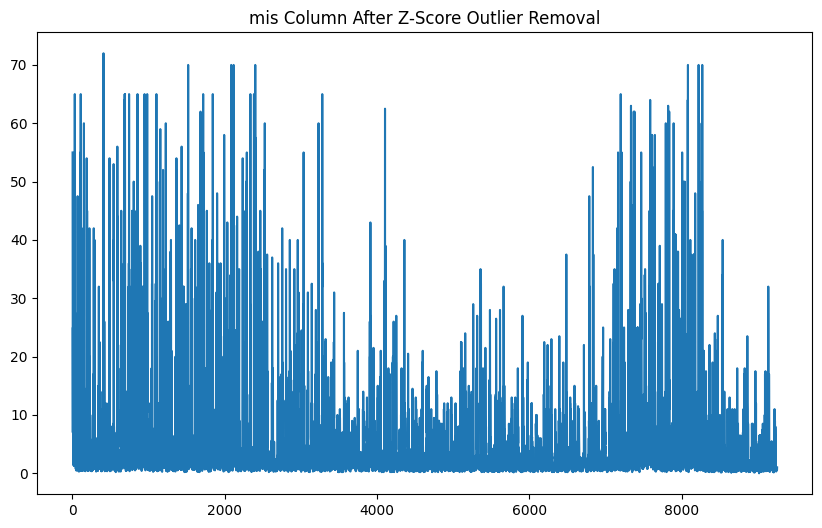

In [84]:
# Visualize the 'mis' column after Z-score outlier removal
plt.figure(figsize=(10, 6))
plt.plot(data_no_outliers_zscore['mis'])
plt.title("mis Column After Z-Score Outlier Removal")
plt.show()

In [85]:
# Statistical summary after removing Z-score outliers
print(data_no_outliers_zscore['mis'].describe())

count    9153.000000
mean        5.041651
std         8.493766
min         0.000000
25%         0.900000
50%         2.000000
75%         5.200000
max        72.000000
Name: mis, dtype: float64


In [86]:
# Save cleaned data to a new CSV file
data_no_outliers_zscore.to_csv('/home/ubuntu/Desktop/Extended/cleaned_mechanical_analysis.csv', index=False)

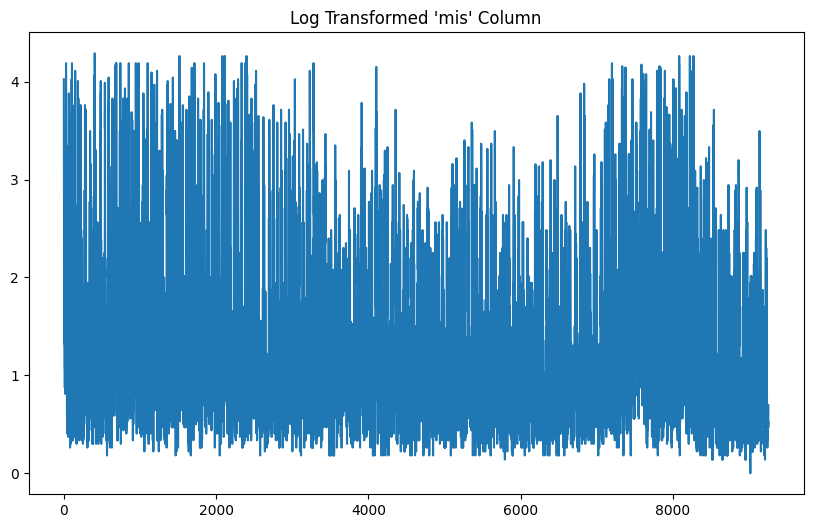

In [87]:
# Apply log transformation
mis_data_log = np.log1p(data_no_outliers_zscore['mis'])

# Visualize the log-transformed data
plt.figure(figsize=(10, 6))
plt.plot(mis_data_log)
plt.title("Log Transformed 'mis' Column")
plt.show()

In [98]:
import pandas as pd

# Load the dataset from a CSV file (replace 'your_dataset.csv' with your actual file path)
df = pd.read_csv('/home/ubuntu/Desktop/Extended/cleaned_mechanical_analysis.csv')

# Display the first few rows to verify it's loaded correctly
print(df.head())

   instance  number  sup  cpm   mis  misr dir   omega  class  comb. class  \
0         1       1    3    0  55.0   7.5  aa  1000.0      1          7.0   
1         1       2    3    0  26.0   1.4  vo  1000.0      1          7.0   
2         1       3    3    0  11.0   0.8  va  1000.0      1          7.0   
3         1       4    2    0   7.0   5.5  ao  1000.0      1          7.0   
4         1       5    2    0  25.0   5.5  aa  1000.0      1          7.0   

   other class  cluster  lof_outliers  
0          NaN        2             1  
1          NaN        0             1  
2          NaN        0             1  
3          NaN        0             1  
4          NaN        0            -1  


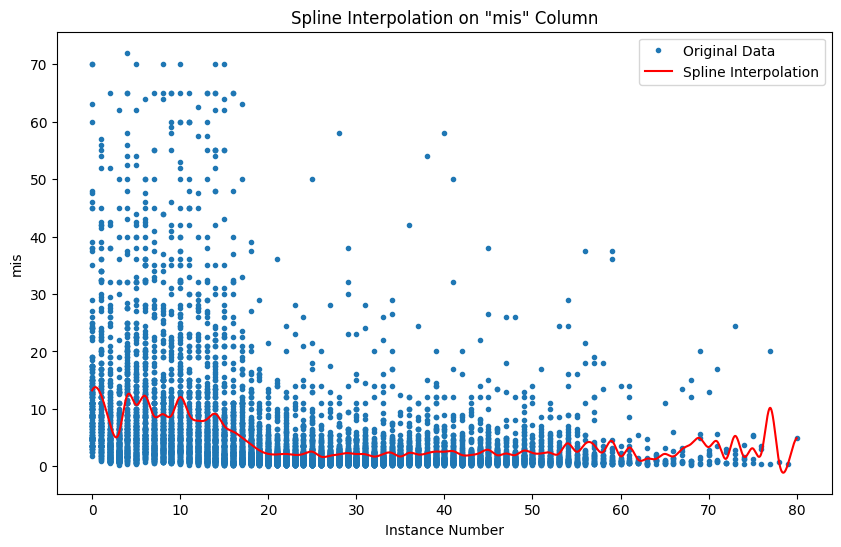

   number  mis_interpolated
0  0.0000         13.214500
1  0.0008         13.217008
2  0.0016         13.219511
3  0.0024         13.222007
4  0.0032         13.224497


In [109]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
import pandas as pd

# Assuming 'df' is your DataFrame
x = df['number'].values  # the 'number' column
y = df['mis'].values  # the 'mis' column

# Step 1: Remove duplicates by averaging 'mis' values for the same 'number'
df_cleaned = df.groupby('number', as_index=False).agg({'mis': 'mean'})

# Step 2: Sort the data by the 'number' column
df_cleaned = df_cleaned.sort_values(by='number')

# Extract sorted x and y values
x_sorted = df_cleaned['number'].values
y_sorted = df_cleaned['mis'].values

# Step 3: Perform cubic spline interpolation
spline = CubicSpline(x_sorted, y_sorted)

# Generate a larger number of new data points (for example, 10,000 points)
x_new = np.linspace(x_sorted.min(), x_sorted.max(), 100000)  # Increase the number of points to 10,000 or more
y_new = spline(x_new)  # Interpolating the 'mis' values for these new points

# Step 4: Plot the original and interpolated data (optional, just to visualize)
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'o', label='Original Data', markersize=3)
plt.plot(x_new, y_new, '-', label='Spline Interpolation', color='r')
plt.title('Spline Interpolation on "mis" Column')
plt.xlabel('Instance Number')
plt.ylabel('mis')
plt.legend()
plt.show()

# Step 5: Add the interpolated values back to the DataFrame
df_interpolated = pd.DataFrame({
    'number': x_new,
    'mis_interpolated': y_new
})

# Show the first few rows of the extended data
print(df_interpolated.head())

# Optionally, save to a new CSV file
df_interpolated.to_csv('/home/ubuntu/Desktop/Extended/spline-extended_data.csv', index=False)

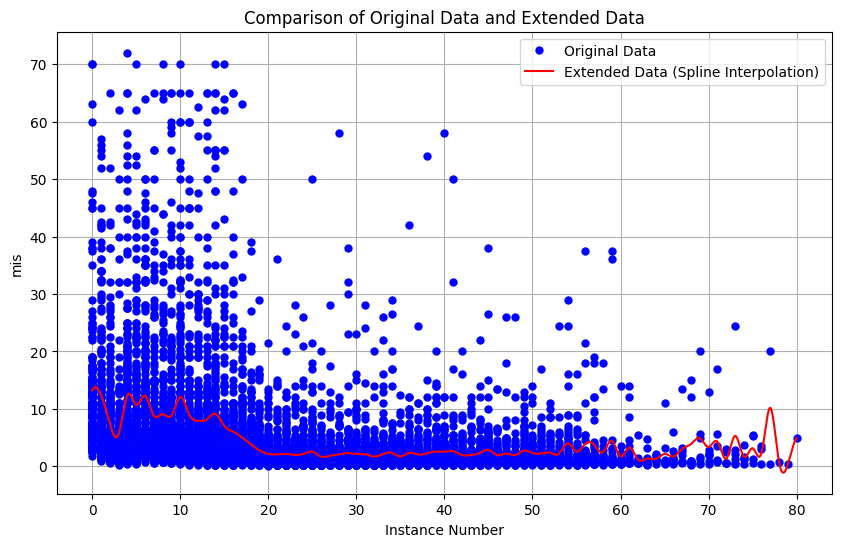

In [110]:
# Plot the original data and the interpolated data (extended data)
plt.figure(figsize=(10, 6))

# Plot original data (as scatter plot)
plt.plot(x, y, 'o', label='Original Data', markersize=5, color='b')

# Plot extended/interpolated data (as a smooth line)
plt.plot(x_new, y_new, '-', label='Extended Data (Spline Interpolation)', color='r')

plt.title('Comparison of Original Data and Extended Data')
plt.xlabel('Instance Number')
plt.ylabel('mis')
plt.legend()
plt.grid(True)
plt.show()

In [111]:
from sklearn.metrics import mean_squared_error
import numpy as np

# MSE Calculation - Only compare values for original data points
y_interpolated_at_original_points = spline(x)  # Get the interpolated values at the original 'x' points

# Compute MSE and RMSE
mse = mean_squared_error(y, y_interpolated_at_original_points)
rmse = np.sqrt(mse)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Squared Error (MSE): 58.281448298562914
Root Mean Squared Error (RMSE): 7.634228729777679


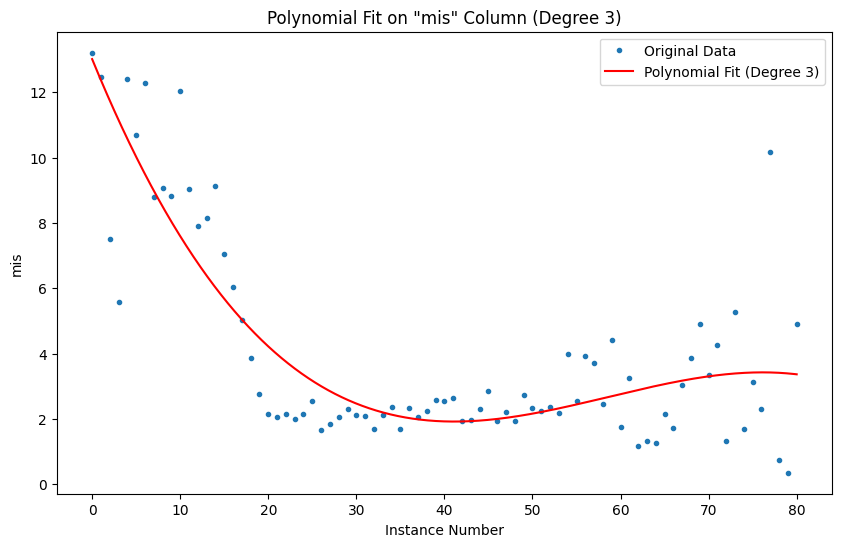

   number  mis_interpolated
0  0.0000         13.019596
1  0.0008         13.019070
2  0.0016         13.018543
3  0.0024         13.018016
4  0.0032         13.017489
Mean Squared Error (MSE): 2.824114940645454
Root Mean Squared Error (RMSE): 1.680510321493282


In [115]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import pandas as pd

# Assuming 'df' is your DataFrame
x = df['number'].values  # the 'number' column
y = df['mis'].values  # the 'mis' column

# Step 1: Remove duplicates by averaging 'mis' values for the same 'number'
df_cleaned = df.groupby('number', as_index=False).agg({'mis': 'mean'})

# Step 2: Sort the data by the 'number' column
df_cleaned = df_cleaned.sort_values(by='number')

# Extract sorted x and y values
x_sorted = df_cleaned['number'].values
y_sorted = df_cleaned['mis'].values

# Step 2: Polynomial fitting (choose the degree, e.g., 3 for cubic)
degree = 3
poly_features = PolynomialFeatures(degree=degree)
x_poly = poly_features.fit_transform(x_sorted.reshape(-1, 1))

# Fit a polynomial regression model
model = LinearRegression()
model.fit(x_poly, y_sorted)

# Step 3: Generate new points for interpolation
x_new = np.linspace(x_sorted.min(), x_sorted.max(), 100000)  # Increase the number of points
x_new_poly = poly_features.transform(x_new.reshape(-1, 1))
y_new = model.predict(x_new_poly)

# Step 4: Plot the original and fitted data
plt.figure(figsize=(10, 6))
plt.plot(x_sorted, y_sorted, 'o', label='Original Data', markersize=3)
plt.plot(x_new, y_new, '-', label=f'Polynomial Fit (Degree {degree})', color='r')
plt.title(f'Polynomial Fit on "mis" Column (Degree {degree})')
plt.xlabel('Instance Number')
plt.ylabel('mis')
plt.legend()
plt.show()

# Step 5: Optionally, add the interpolated values back to the DataFrame
df_interpolated = pd.DataFrame({
    'number': x_new,
    'mis_interpolated': y_new
})

# Show the first few rows of the interpolated data
print(df_interpolated.head())

# Step 6: Compute MSE and RMSE for the fit
from sklearn.metrics import mean_squared_error
from math import sqrt

# Predict values for the original data
y_pred = model.predict(poly_features.transform(x_sorted.reshape(-1, 1)))

# Compute MSE and RMSE
mse = mean_squared_error(y_sorted, y_pred)
rmse = sqrt(mse)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
# Save the extended (interpolated) data to a CSV file
df_interpolated.to_csv('/home/ubuntu/Desktop/Extended/polynomial-extended_data.csv', index=False)

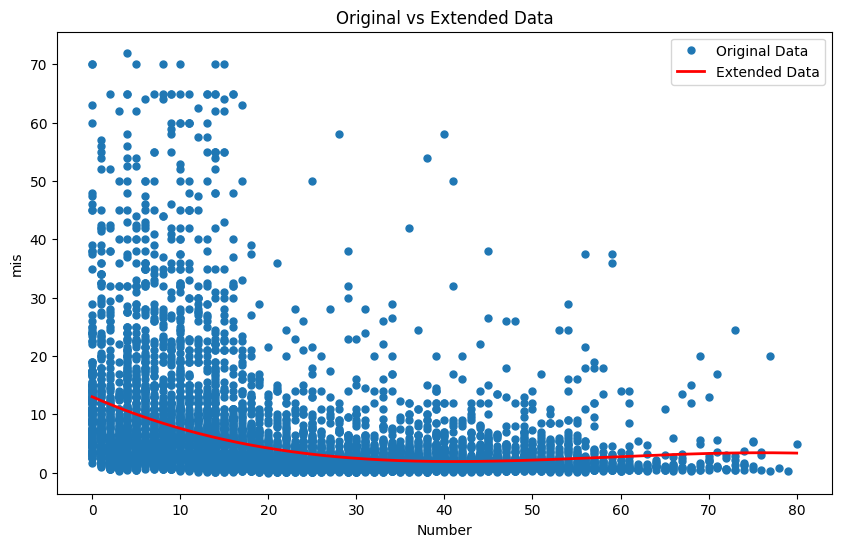

In [116]:
import matplotlib.pyplot as plt

# Plot the original and extended (interpolated) data
plt.figure(figsize=(10, 6))
plt.plot(df['number'], df['mis'], 'o', label='Original Data', markersize=5)
plt.plot(df_interpolated['number'], df_interpolated['mis_interpolated'], '-', label='Extended Data', color='r', linewidth=2)
plt.title('Original vs Extended Data')
plt.xlabel('Number')
plt.ylabel('mis')
plt.legend()
plt.show()

In [117]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Align the original and interpolated data for comparison
# The x-values should be aligned; in the case of original data, the 'number' values should match with the new ones.
x_interpolated = df_interpolated['number'].values
y_interpolated = df_interpolated['mis_interpolated'].values

# Ensure both sets are comparable (original data at the same points as interpolated)
# This assumes the original data points are in the same range as the interpolated ones.
# You might want to resample the original data or align both datasets.
x_original = df['number'].values
y_original = df['mis'].values

# Align the datasets by the x-values (if needed, depending on how you generated the extended data)
# For simplicity, let’s check MSE only for the overlapping original data range and interpolated data points
x_min = min(x_original.min(), x_interpolated.min())
x_max = max(x_original.max(), x_interpolated.max())

# Resample the original data to match the extended data points, ensuring we're comparing the same x-range
x_resampled = np.linspace(x_min, x_max, len(x_interpolated))
y_resampled = np.interp(x_resampled, x_original, y_original)

# Compute the MSE and RMSE
mse = mean_squared_error(y_resampled, y_interpolated)
rmse = np.sqrt(mse)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Squared Error (MSE): 41.63756268998509
Root Mean Squared Error (RMSE): 6.452717465532261


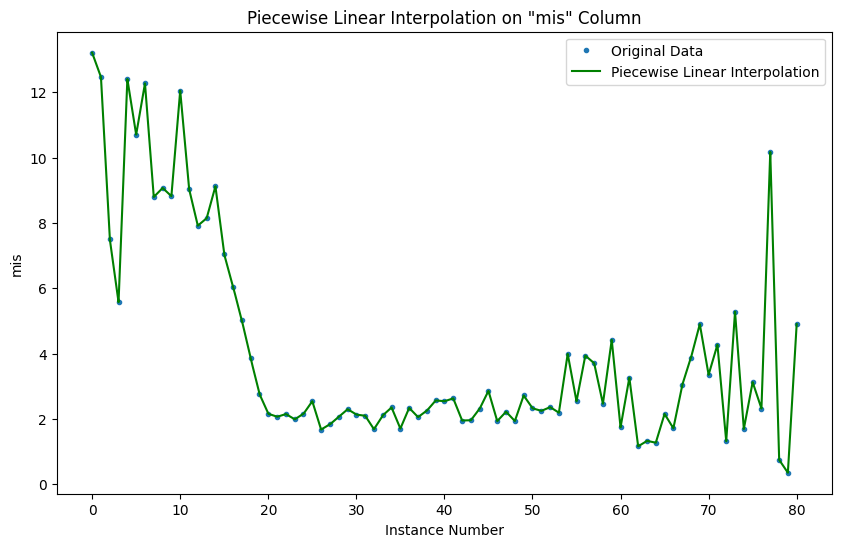

   number  mis_interpolated
0  0.0000         13.214500
1  0.0008         13.213911
2  0.0016         13.213322
3  0.0024         13.212732
4  0.0032         13.212143


In [120]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import pandas as pd

# Assuming 'df' is your DataFrame
x = df['number'].values  # the 'number' column
y = df['mis'].values  # the 'mis' column

# Step 1: Remove duplicates by averaging 'mis' values for the same 'number'
df_cleaned = df.groupby('number', as_index=False).agg({'mis': 'mean'})

# Step 2: Sort the data by the 'number' column
df_cleaned = df_cleaned.sort_values(by='number')

# Extract sorted x and y values
x_sorted = df_cleaned['number'].values
y_sorted = df_cleaned['mis'].values

# Step 2: Perform piecewise linear interpolation
linear_interpolation = interp1d(x_sorted, y_sorted, kind='linear')

# Generate intermediate points for interpolation
x_new = np.linspace(x_sorted.min(), x_sorted.max(), 100000)  # Increase the number of points for better simulation
y_new = linear_interpolation(x_new)

# Step 3: Plot the original and interpolated data
plt.figure(figsize=(10, 6))
plt.plot(x_sorted, y_sorted, 'o', label='Original Data', markersize=3)
plt.plot(x_new, y_new, '-', label='Piecewise Linear Interpolation', color='g')
plt.title('Piecewise Linear Interpolation on "mis" Column')
plt.xlabel('Instance Number')
plt.ylabel('mis')
plt.legend()
plt.show()

# Step 4: Save the interpolated data
df_interpolated = pd.DataFrame({
    'number': x_new,
    'mis_interpolated': y_new
})

# Save the extended data to a CSV file
df_interpolated.to_csv('/home/ubuntu/Desktop/Extended/piecewise-extended_data.csv', index=False)

# Show the first few rows of the interpolated data
print(df_interpolated.head())

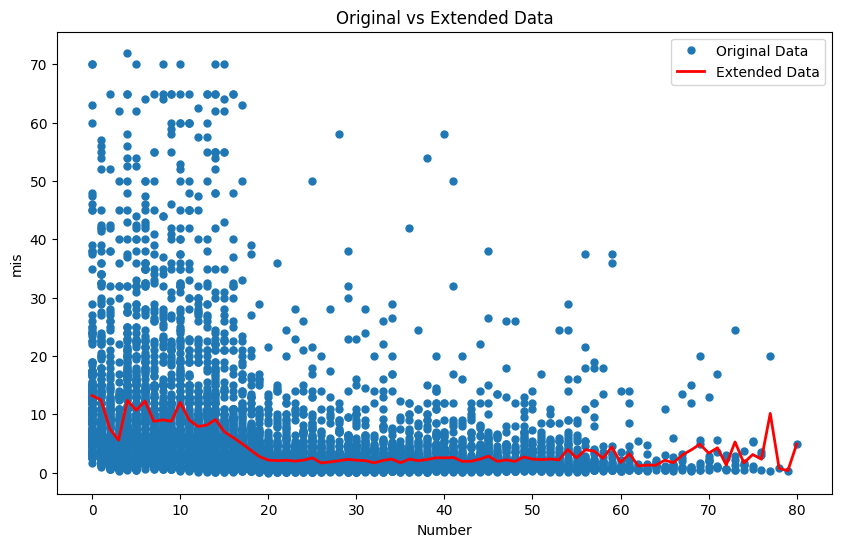

In [122]:
import matplotlib.pyplot as plt

# Assuming 'df' is the original DataFrame and 'df_interpolated' is the extended DataFrame
# Plot the original and extended (interpolated) data
plt.figure(figsize=(10, 6))
plt.plot(df['number'], df['mis'], 'o', label='Original Data', markersize=5)  # Original Data as points
plt.plot(df_interpolated['number'], df_interpolated['mis_interpolated'], '-', label='Extended Data', color='r', linewidth=2)  # Extended Data as a line
plt.title('Original vs Extended Data')
plt.xlabel('Number')
plt.ylabel('mis')
plt.legend()
plt.show()

In [124]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Align the original and interpolated data for comparison
x_interpolated = df_interpolated['number'].values  # Interpolated x-values
y_interpolated = df_interpolated['mis_interpolated'].values  # Interpolated y-values

# Ensure both sets are comparable (original data at the same points as interpolated)
x_original = df['number'].values  # Original x-values
y_original = df['mis'].values  # Original y-values

# Align the datasets by the x-values (if needed, depending on how you generated the extended data)
# For simplicity, let's check MSE only for the overlapping original data range and interpolated data points
x_min = min(x_original.min(), x_interpolated.min())
x_max = max(x_original.max(), x_interpolated.max())

# Resample the original data to match the extended data points, ensuring we're comparing the same x-range
x_resampled = np.linspace(x_min, x_max, len(x_interpolated))  # Resampling original data x-values
y_resampled = np.interp(x_resampled, x_original, y_original)  # Interpolating corresponding y-values

# Compute the MSE and RMSE
mse = mean_squared_error(y_resampled, y_interpolated)
rmse = np.sqrt(mse)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Squared Error (MSE): 45.89171339309149
Root Mean Squared Error (RMSE): 6.774342284907923


In [125]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

# Prepare data for regression
X = df_interpolated['number'].values.reshape(-1, 1)  # 'number' column as features
y = df_interpolated['mis_interpolated'].values  # 'mis_interpolated' as target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optionally, scale the features for SVR model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [126]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Train the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict using the trained model
y_pred_rf = rf_model.predict(X_test)

# Evaluate performance
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest MSE: {mse_rf}")
print(f"Random Forest RMSE: {rmse_rf}")
print(f"Random Forest R^2: {r2_rf}")

Random Forest MSE: 0.0001043963611650456
Random Forest RMSE: 0.01021745375154914
Random Forest R^2: 0.9999889542953122


In [127]:
from sklearn.ensemble import GradientBoostingRegressor

# Train the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Predict using the trained model
y_pred_gb = gb_model.predict(X_test)

# Evaluate performance
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Gradient Boosting MSE: {mse_gb}")
print(f"Gradient Boosting RMSE: {rmse_gb}")
print(f"Gradient Boosting R^2: {r2_gb}")

Gradient Boosting MSE: 0.06660044356266025
Gradient Boosting RMSE: 0.25807061739504605
Gradient Boosting R^2: 0.9929533096416746


In [128]:
from sklearn.svm import SVR

# Train the Support Vector Regression model
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train_scaled, y_train)

# Predict using the trained model
y_pred_svr = svr_model.predict(X_test_scaled)

# Evaluate performance
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print(f"SVR MSE: {mse_svr}")
print(f"SVR RMSE: {rmse_svr}")
print(f"SVR R^2: {r2_svr}")

SVR MSE: 1.435550485816621
SVR RMSE: 1.1981446013802428
SVR R^2: 0.8481109250004322


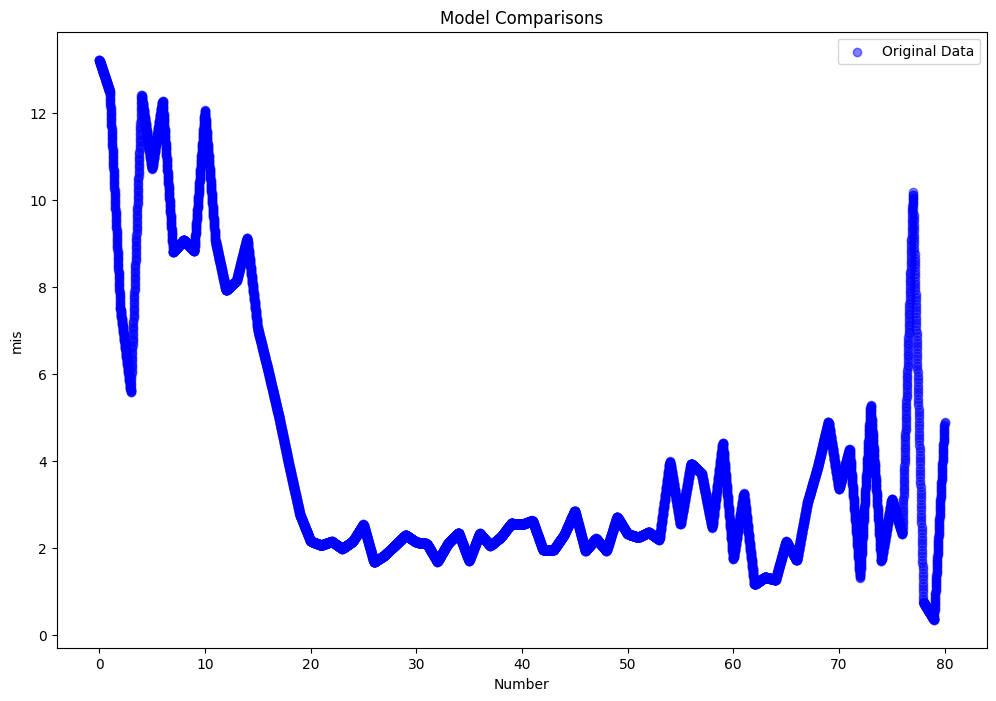

In [134]:
import matplotlib.pyplot as plt

# Plot the original vs predicted values for each model
plt.figure(figsize=(12, 8))

# Plot Original Data
plt.scatter(X, y, color='blue', label='Original Data', alpha=0.5)

# Plot Random Forest Predictions
#plt.plot(X_test, y_pred_rf, color='red', label='Random Forest Predictions')

# Plot Gradient Boosting Predictions
#plt.plot(X_test, y_pred_gb, color='green', label='Gradient Boosting Predictions')

# Plot SVR Predictions
#plt.plot(X_test, y_pred_svr, color='purple', label='SVR Predictions')

plt.title("Model Comparisons")
plt.xlabel("Number")
plt.ylabel("mis")
plt.legend()
plt.show()

In [135]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

# Perform Grid Search with Cross-Validation
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search_rf.fit(X_train, y_train)

# Best parameters and best score
print(f"Best parameters for Random Forest: {grid_search_rf.best_params_}")
print(f"Best cross-validation score: {grid_search_rf.best_score_}")

# Evaluate the best model on the test set
y_pred_rf_grid = grid_search_rf.best_estimator_.predict(X_test)
mse_rf_grid = mean_squared_error(y_test, y_pred_rf_grid)
rmse_rf_grid = np.sqrt(mse_rf_grid)
print(f"Random Forest RMSE after tuning: {rmse_rf_grid}")

Best parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation score: -0.0001934181798974889
Random Forest RMSE after tuning: 0.01021745375154914


In [136]:
from sklearn.ensemble import GradientBoostingRegressor

# Define the parameter grid for Gradient Boosting
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)

# Perform Grid Search with Cross-Validation
grid_search_gb = GridSearchCV(estimator=gb_model, param_grid=param_grid_gb, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search_gb.fit(X_train, y_train)

# Best parameters and best score
print(f"Best parameters for Gradient Boosting: {grid_search_gb.best_params_}")
print(f"Best cross-validation score: {grid_search_gb.best_score_}")

# Evaluate the best model on the test set
y_pred_gb_grid = grid_search_gb.best_estimator_.predict(X_test)
mse_gb_grid = mean_squared_error(y_test, y_pred_gb_grid)
rmse_gb_grid = np.sqrt(mse_gb_grid)
print(f"Gradient Boosting RMSE after tuning: {rmse_gb_grid}")

Best parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation score: -0.0004925910080022328
Gradient Boosting RMSE after tuning: 0.0197359779456295


In [137]:
from sklearn.svm import SVR

# Define the parameter grid for SVR
param_grid_svr = {
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.2],
    'kernel': ['rbf', 'linear'],
    'gamma': ['scale', 'auto']
}

# Initialize the SVR model
svr_model = SVR()

# Perform Grid Search with Cross-Validation
grid_search_svr = GridSearchCV(estimator=svr_model, param_grid=param_grid_svr, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search_svr.fit(X_train_scaled, y_train)

# Best parameters and best score
print(f"Best parameters for SVR: {grid_search_svr.best_params_}")
print(f"Best cross-validation score: {grid_search_svr.best_score_}")

# Evaluate the best model on the test set
y_pred_svr_grid = grid_search_svr.best_estimator_.predict(X_test_scaled)
mse_svr_grid = mean_squared_error(y_test, y_pred_svr_grid)
rmse_svr_grid = np.sqrt(mse_svr_grid)
print(f"SVR RMSE after tuning: {rmse_svr_grid}")

Best parameters for SVR: {'C': 10, 'epsilon': 0.2, 'gamma': 'scale', 'kernel': 'rbf'}
Best cross-validation score: -1.4407189544076355
SVR RMSE after tuning: 1.1606227769502897


In [138]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter distribution for Random Forest
param_dist_rf = {
    'n_estimators': [50, 100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

# Perform Randomized Search with Cross-Validation
random_search_rf = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist_rf, n_iter=10, cv=5, n_jobs=-1, scoring='neg_mean_squared_error', random_state=42)
random_search_rf.fit(X_train, y_train)

# Best parameters and best score
print(f"Best parameters for Random Forest (RandomizedSearchCV): {random_search_rf.best_params_}")
print(f"Best cross-validation score: {random_search_rf.best_score_}")

# Evaluate the best model on the test set
y_pred_rf_random = random_search_rf.best_estimator_.predict(X_test)
mse_rf_random = mean_squared_error(y_test, y_pred_rf_random)
rmse_rf_random = np.sqrt(mse_rf_random)
print(f"Random Forest RMSE after RandomizedSearchCV: {rmse_rf_random}")

/home/ubuntu/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/home/ubuntu/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/ubuntu/.local/lib/python3.10/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/home/ubuntu/.local/lib/python3.10/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/home/ubuntu/.local/l

Best parameters for Random Forest (RandomizedSearchCV): {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}
Best cross-validation score: -0.0001947655803203182
Random Forest RMSE after RandomizedSearchCV: 0.010056160019866488


In [141]:
from sklearn.ensemble import RandomForestRegressor

# Best parameters found during hyperparameter tuning
best_params_rf = {
    'n_estimators': 100,
    'min_samples_split': 2,
    'min_samples_leaf': 1,
    'max_depth': None
}

# Train the Random Forest model with the best parameters
rf_model = RandomForestRegressor(**best_params_rf)
rf_model.fit(x_original.reshape(-1, 1), y_original)  # Reshape if needed

RandomForestRegressor()

In [142]:
# Generate extended x-values (same range but with more points)
x_extended = np.linspace(x_original.min(), x_original.max(), 100000)  # For 10,000 points

# Use the trained Random Forest model to predict values for the extended x-values
y_extended = rf_model.predict(x_extended.reshape(-1, 1))

# Create the extended simulated dataset
df_extended = pd.DataFrame({'number': x_extended, 'mis_simulated': y_extended})

# Display the first few rows of the extended dataset
print(df_extended.head())

   number  mis_simulated
0  0.0000      13.330138
1  0.0008      13.330138
2  0.0016      13.330138
3  0.0024      13.330138
4  0.0032      13.330138


In [143]:
# Save the extended simulated data to a CSV file
df_extended.to_csv('/home/ubuntu/Desktop/Extended/Randomf_mechanical_analysis_extended.csv', index=False)

In [144]:
# Resample original data to match the extended data points
y_original_resampled = np.interp(x_extended, x_original, y_original)

# Compute MSE and RMSE
mse_extended = mean_squared_error(y_original_resampled, y_extended)
rmse_extended = np.sqrt(mse_extended)

print(f"Mean Squared Error (MSE) between original and extended data: {mse_extended}")
print(f"Root Mean Squared Error (RMSE) between original and extended data: {rmse_extended}")

Mean Squared Error (MSE) between original and extended data: 46.51030115332826
Root Mean Squared Error (RMSE) between original and extended data: 6.819846123874663


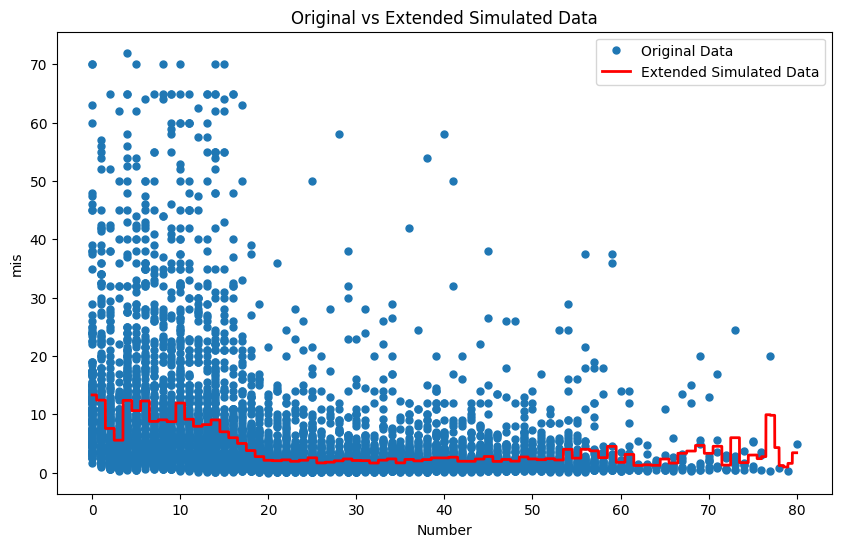

In [145]:
# Plot the original data and extended simulated data
plt.figure(figsize=(10, 6))
plt.plot(x_original, y_original, 'o', label='Original Data', markersize=5)
plt.plot(df_extended['number'], df_extended['mis_simulated'], '-', label='Extended Simulated Data', color='r', linewidth=2)
plt.title('Original vs Extended Simulated Data')
plt.xlabel('Number')
plt.ylabel('mis')
plt.legend()
plt.show()

In [ ]:
# Adjust the column names to match the 21 columns in the dataset
column_names = ['instance', 'number', 'sup', 'cpm', 'mis', 'misr', 'dir', 'omega', 
                'class', 'comb. class', 'other class', 'cluster', 'lof_outliers',
                'additional_column_1', 'additional_column_2', 'additional_column_3', 
                'additional_column_4', 'additional_column_5', 'additional_column_6', 
                'additional_column_7', 'additional_column_8']  # Add more names as necessary

# Check that the length of column_names matches the number of columns in the dataset
if len(column_names) != data_scaled_imputed.shape[1]:
    raise ValueError(f"Mismatch in the number of columns: {len(column_names)} columns provided, but data has {data_scaled_imputed.shape[1]} columns")

# Convert the numpy array to a DataFrame with the adjusted column names
data_scaled_imputed = pd.DataFrame(data_scaled_imputed, columns=column_names)

# Proceed with generating intermediate points and extending the data

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

# Assuming `data_scaled_imputed` is already a DataFrame with 21 columns
# Adjust the column names based on the actual data

column_names = ['instance', 'number', 'sup', 'cpm', 'mis', 'misr', 'dir', 'omega', 
                'class', 'comb. class', 'other class', 'cluster', 'lof_outliers',
                'additional_column_1', 'additional_column_2', 'additional_column_3', 
                'additional_column_4', 'additional_column_5', 'additional_column_6', 
                'additional_column_7', 'additional_column_8']

# KMeans clustering (adjust n_clusters as needed)
kmeans = KMeans(n_clusters=5, random_state=42)  # Example with 5 clusters
kmeans.fit(data_scaled_imputed)

# Get the cluster centers
cluster_centers = kmeans.cluster_centers_

# Generate intermediate points between each pair of consecutive centers
def generate_intermediate_points(c1, c2, num_points=5):
    # Linearly interpolate between two points
    return np.linspace(c1, c2, num_points)

# List to store all intermediate points
all_intermediate_points = []

# Generate intermediate points for each pair of consecutive cluster centers
for i in range(len(cluster_centers) - 1):
    c1 = cluster_centers[i]
    c2 = cluster_centers[i + 1]
    
    # Generate intermediate points between c1 and c2
    intermediate_points = generate_intermediate_points(c1, c2, num_points=5)
    all_intermediate_points.append(intermediate_points)

# Stack all intermediate points into one array
all_intermediate_points = np.vstack(all_intermediate_points)

# Convert intermediate points into a DataFrame with appropriate column names
extended_data = pd.DataFrame(all_intermediate_points, columns=column_names[:all_intermediate_points.shape[1]])

# Step 2: Combine the original data with the generated intermediate points
combined_data = pd.concat([data_scaled_imputed, extended_data], ignore_index=True)

# Save the combined dataset to a CSV file
combined_data.to_csv('/home/ubuntu/Desktop/Extended/mechanical_analysis_extended.csv', index=False)

# Output the shape and some preview of the combined dataset
print(f"Shape of combined dataset: {combined_data.shape}")
print(combined_data.head())

In [ ]:
import pandas as pd

# Define the paths to your original and extended CSV files
original_data_path = "/home/ubuntu/Desktop/Extended/mechanical_analysis.csv"  # Replace with the actual path
extended_data_path = "/home/ubuntu/Desktop/Extended/mechanical_analysis_extended.csv"  # Replace with the actual path

# Load the original and extended data
original_data = pd.read_csv(original_data_path)
combined_data = pd.read_csv(extended_data_path)  # Assuming you saved the extended dataset

# Check the first few rows of the data to ensure it's loaded correctly
print(original_data.head())
print(combined_data.head())

In [ ]:
!pip install seaborn

In [ ]:
# Filter for numeric columns
numeric_columns = original_data.select_dtypes(include=[np.number]).columns
numeric_original_data = original_data[numeric_columns]
numeric_combined_data = combined_data[numeric_columns]

# Compute correlation matrices for numeric data
original_corr = numeric_original_data.corr()
extended_corr = numeric_combined_data.corr()

# Plot the correlation matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 8))

# Plot original data correlation matrix
axes[0].matshow(original_corr, cmap='coolwarm')
axes[0].set_title('Correlation Matrix of Original Data')
axes[0].set_xticks(range(original_corr.shape[1]))
axes[0].set_yticks(range(original_corr.shape[0]))
axes[0].set_xticklabels(original_corr.columns, rotation=90)
axes[0].set_yticklabels(original_corr.columns)

# Plot extended data correlation matrix
axes[1].matshow(extended_corr, cmap='coolwarm')
axes[1].set_title('Correlation Matrix of Extended Data')
axes[1].set_xticks(range(extended_corr.shape[1]))
axes[1].set_yticks(range(extended_corr.shape[0]))
axes[1].set_xticklabels(extended_corr.columns, rotation=90)
axes[1].set_yticklabels(extended_corr.columns)

plt.tight_layout()
plt.show()
